## Step 1 : Import Required Liabrary

In [62]:
import matplotlib.pyplot as plt
import cv2   # computer vision --> lab design for images
import os
import numpy as np
import tensorflow as tf

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [17]:
path1 = r"C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classification\train"    # reach path of Train folder
cate = ['Boots','Sandals','Slippers']   # category


image_size = 200
input_image = []    
for i in cate:
    folders = os.path.join(path1 ,i)   # join path1 + cate[i] to access All folder of categorial images
    label   = cate.index(i)                              # Target Variable Label
    for image in os.listdir(folders):                   
        image_path  = os.path.join(folders , image)      # Accessing All individual images
        image_array =  cv2.imread(image_path)           # to read image using cv2, it will in array fmt      
        image_array =cv2.resize(image_array , (image_size  , image_size) ) 
        #Every image have different shape so convert all img into same shape we will do resize into 200 x 200
        input_image.append([image_array , label])     # getting imges as a x ad with r to label as y

In [18]:
np.random.shuffle(input_image)    # equivalent to random smpling
input_image

[[array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255

In [19]:
x = []
y = []

for x_values, label in input_image:
    x.append(x_values)
    y.append(label)

In [20]:
#x

In [21]:
#y

In [22]:
x = np.array(x)
y = np.array(y)

## Step 2: Standarization

In [23]:
x = x/255     # Standardization all values will convert into 0 and 1

In [25]:
from sklearn.model_selection import train_test_split
train_x,test_x, train_y,test_y = train_test_split(x,y,test_size=0.2)

In [26]:
train_y= to_categorical(train_y)      # one hot encoding converted into categorical(if )

In [27]:
train_y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [29]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((622, 200, 200, 3), (622, 3), (156, 200, 200, 3), (156,))

In [30]:
model = Sequential()
model.add(Conv2D(filters=32 ,kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(3,activation='softmax'))

In [31]:
adam = tf.keras.optimizers.Adam(lr = 0.01)
model.compile(optimizer=adam,loss = 'categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(train_x,train_y,epochs = 10,batch_size=64,validation_split=0.2)

Epoch 1/10
8/8 [==============================] - 15s 2s/step - loss: 0.2376 - accuracy: 0.9215 - val_loss: 0.4397 - val_accuracy: 0.8160
Epoch 2/10
8/8 [==============================] - 14s 2s/step - loss: 0.1874 - accuracy: 0.9497 - val_loss: 0.4465 - val_accuracy: 0.8320
Epoch 3/10
8/8 [==============================] - 16s 2s/step - loss: 0.1401 - accuracy: 0.9658 - val_loss: 0.4458 - val_accuracy: 0.8000
Epoch 4/10
8/8 [==============================] - 16s 2s/step - loss: 0.1031 - accuracy: 0.9738 - val_loss: 0.4172 - val_accuracy: 0.8160
Epoch 5/10
8/8 [==============================] - 16s 2s/step - loss: 0.0868 - accuracy: 0.9759 - val_loss: 0.3827 - val_accuracy: 0.8640
Epoch 6/10
8/8 [==============================] - 15s 2s/step - loss: 0.0670 - accuracy: 0.9899 - val_loss: 0.3897 - val_accuracy: 0.8640
Epoch 7/10
8/8 [==============================] - 13s 2s/step - loss: 0.0510 - accuracy: 0.9960 - val_loss: 0.3957 - val_accuracy: 0.8720
Epoch 8/10
8/8 [==================

## Step 3:Prediction

In [42]:
pred_x = model.predict(test_x)

5/5 [==============================] - 1s 207ms/step


In [43]:
pred_x_class = pred_x.argmax(axis = 1)

In [44]:
from sklearn.metrics import confusion_matrix

## Step 4: Confusion Matrix

In [45]:
tab = confusion_matrix(test_y,pred_x_class)
tab

array([[65,  1,  0],
       [ 1, 61,  4],
       [ 0,  4, 20]], dtype=int64)

In [46]:
Accuracy = tab.diagonal().sum()*100/tab.sum()
Accuracy

93.58974358974359

## Step 5: Prediction Test Data

In [51]:
model.save('Foot_Wear_classifier.h5')

C:\Users\MR.GODHADE\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
from keras.models import load_model
from keras_preprocessing import image
import matplotlib.pyplot as plt 
%matplotlib inline

In [54]:
Final_model = load_model("Foot_Wear_classifier.h5")

In [55]:
pred = Final_model.predict(test_x)
pred

5/5 [==============================] - 2s 236ms/step


array([[4.86315042e-01, 5.11937678e-01, 1.74723705e-03],
       [5.20283065e-05, 1.64471537e-01, 8.35476458e-01],
       [3.19763756e-04, 1.26503691e-01, 8.73176575e-01],
       [1.27675629e-03, 9.98213530e-01, 5.09772624e-04],
       [9.99655128e-01, 3.44906148e-04, 4.14312790e-13],
       [9.98588741e-01, 1.41107303e-03, 7.62597239e-08],
       [9.99999523e-01, 4.28126356e-07, 1.33736289e-09],
       [4.01403010e-03, 9.95675862e-01, 3.10114352e-04],
       [5.05934528e-04, 1.59046724e-01, 8.40447307e-01],
       [1.00000000e+00, 4.44430759e-09, 2.35974716e-12],
       [9.99759614e-01, 2.40418143e-04, 1.06217546e-09],
       [1.73188761e-04, 3.84578109e-01, 6.15248680e-01],
       [9.99980927e-01, 1.91041800e-05, 1.06537488e-17],
       [9.99999642e-01, 4.16048408e-07, 6.64617739e-09],
       [2.70410776e-02, 8.45996961e-02, 8.88359308e-01],
       [9.99992490e-01, 6.34931939e-06, 1.18013782e-06],
       [6.85830810e-06, 5.44474661e-01, 4.55518395e-01],
       [3.84202087e-03, 1.41658

In [56]:
tab = confusion_matrix(test_y,pred.argmax(axis=1))
tab

array([[65,  1,  0],
       [ 1, 61,  4],
       [ 0,  4, 20]], dtype=int64)

In [57]:
Accuracy = tab.diagonal().sum()*100/tab.sum()
Accuracy

93.58974358974359

In [79]:
def Predict_Image (path):
    raw_img = cv2.imread(path)   # importing image
    raw_img =cv2.resize(raw_img , (200 , 200) ) 
    raw_img = np.array(raw_img) # convert image to array
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = Final_model.predict(raw_img)  # probability for each classes
    pred= Probability.argmax(axis=1)
    plt.imshow(cv2.imread(path))                # Display Image
    if pred == 0:
        print("This image is of Boot")
    elif pred == 1:
        print("This image is of Sandals")
    else:
        print("This image is of Slippers")

## Prediction On Test File Data

1/1 [==============================] - 0s 102ms/step
This image is of Sandals


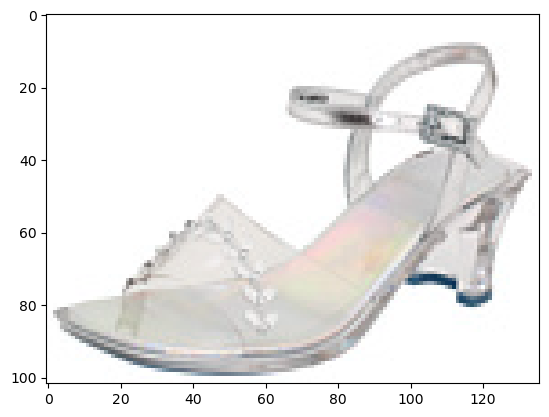

In [80]:
Predict_Image (r"C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classification\test\image (30).jpg")

1/1 [==============================] - 0s 51ms/step
This image is of Boot


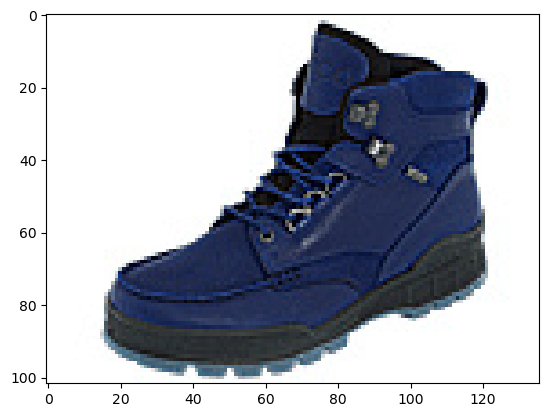

In [81]:
Predict_Image(r"C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classification\test\image (6).jpg")

1/1 [==============================] - 0s 55ms/step
This image is of Slippers


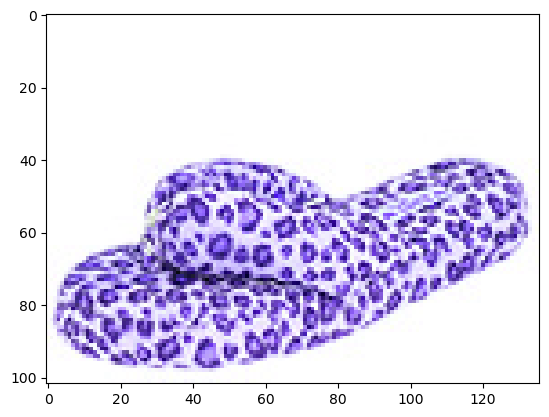

In [82]:
Predict_Image(r"C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classification\test\image (59).jpg")

In [97]:
def get_image_paths(folder_path, image_extensions=['.jpg', '.jpeg', '.png']):
    image_paths = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_paths.append(os.path.join(root, file))

    return image_paths

# Example usage:
folder_path = r"C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classification\test"
image_paths = get_image_paths(folder_path)

In [103]:
from keras_preprocessing import image
def Test_Image (imagepath):
    Image_Paths = []
    Labels = []
    labels_in_words = []
    for i in imagepath:
        Image_Paths.append(i)
        #print(Image_Paths)
        raw_img = cv2.imread(i)   # importing image
        raw_img =cv2.resize(raw_img , (200 , 200) ) 
        raw_img = np.array(raw_img) # convert image to array
        raw_img = np.expand_dims(raw_img, axis=0)
        raw_img = raw_img/255                     # data max normalization
        Probability = Final_model.predict(raw_img)  # probability for each classes
        final_prediction = Probability.argmax(axis=1)
        Labels.append(final_prediction)
        #plt.imshow(cv2.imread(path))                # Display Image
        if final_prediction == 0:
            labels_in_words.append('Boots')
            #print("The image is of Boots")
        elif final_prediction == 1:
            labels_in_words.append('Sandals')
            #print("The image is of Sandals")
        else:
            labels_in_words.append('Slippers')
            #print("The image is of Slippers")
    return Image_Paths,Labels,labels_in_words

In [112]:
Image_Paths,Labels,labels_in_words = Test_Image(image_paths)

1/1 [==============================] - 0s 68ms/step


In [114]:
import pandas as pd

In [125]:
Result_df = pd.DataFrame(columns = ["Image_Paths","Labels","labels_in_words"])

In [126]:
Result_df["Image_Paths"] = Image_Paths
Result_df["Labels"] = Labels
Result_df["labels_in_words"] = labels_in_words

## Test File Result Classification

In [127]:
Result_df

,Image_Paths,Labels,labels_in_words
0,C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classifi...,[1],Sandals
1,C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classifi...,[0],Boots
2,C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classifi...,[0],Boots
3,C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classifi...,[2],Slippers
4,C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classifi...,[0],Boots
...,...,...,...
84,C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classifi...,[1],Sandals
85,C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classifi...,[1],Sandals
86,C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classifi...,[0],Boots
87,C:\Users\MR.GODHADE\Desktop\SEM3\Shoe Classifi...,[2],Slippers


## Conclusion

 - The achieved accuracy of 93.58% indicates that the footwear classification model is effective in distinguishing between different types of footwear.